# CAPSTONE PROJECT- **_Battle of the Neighborhood (Fitness in NYC)!_** 
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Step 1: Data & Packages](#step1)
* [Step 2: Transform Data](#step2)
* [Step 3: FourSquare API & Borough Analysis](#step3)
* [Step 4: Clustering & Graphing (Brooklyn)](#step4)
* [Step 5: Conclusion & Results](#step5)

## Introduction: Problem Statement, Method & Data  <a name="introduction"></a>

# Intro:
This final project explores which neighborhood in NYC has the BEST fitness options for enthusiasts. When people move to a major city like New York it might be overwhelming to find the best neighborhood/borough with the best options for fitness venues. This is where the genesis of this project came from. Hopefully this helps make your move to NYC easier by taking one decision off your plate if your a fitness buff or trying to start your new years resolution on the right path.  

# Problem Statement:
What's the best location to move to in NYC to have the best options for your favorite fitness venues?

# Method:
• Will use data collected from Data https://cocl.us/new_york_dataset.

• Will  utilize FourSquare to find out where all the fitness related venues are located in NYC. 

•**We will use both of our data sources, to create a clustering of the all the fitness facilities in NYC. We will see first, which borough has the most fitness venues and second, we will choose a specific type of fitness venue and see how that breaksdown on a neighbhorhood by neighborhood level.**  

• Will visualize using mapping package Follium & matplotlib.  

# Data:
Will use NYC data from the data source: https://cocl.us/new_york_dataset

Will use NYC neighborhood boundaries from the data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

Will use **FOURSQUARE API** data to find the fitness facility locations and mapping data from follium and other python packages. 


## Step 1: Download all the packages/libraries and data we will need. <a name="step1"></a>

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 

In [66]:
import folium

Lets load the NYC data.

In [6]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [ ]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
newyork_data

## Step 2: Let's transform the Data! <a name="step2"></a>

We are pulling the relevant data from our json dataset and created a dataframe of Boroughs, Neigbhorhoods, Latitude and Longitude 
from the feature type of our data.

In [8]:
#Lets create a dataframe for features becuase this is where the data we need is located in our dataset.
neighborhoods_data = newyork_data['features']

In [9]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)


In [10]:
for data in neighborhoods_data: 
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [11]:
#Lets check and see if the data downloaded correctly. 
neighborhoods.head()


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [12]:
#How many rows and columns in NYC dataframe. 
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [99]:
# create map of New York City using latitude and longitude values.

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Lets see how many neighborhoods there are in each borough in NYC. 

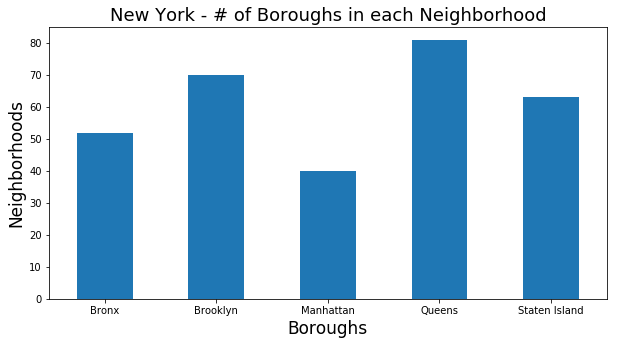

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
neighborhoods.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5))
plt.title('New York - # of Boroughs in each Neighborhood', fontsize = 18)
plt.xlabel('Boroughs', fontsize = 17)
plt.ylabel('Neighborhoods',fontsize = 17)
plt.xticks(rotation = 'horizontal')
plt.show()
# queens has most neighborhoods

In [96]:
#Since Queens has the most neighborhoods lets create a Queens dataframe

queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [97]:
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


In [98]:
# Create map of Queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

## Step 3: Utilize the Foursquare API to explore the Boroughs and segment them. <a name="step3"></a>

In [13]:
#import Foursquare API and your credentials
import requests

CLIENT_ID = 'XLSP4L03XLW1LQ3FRYF3IDZ3NP3TNO3SZGFNKYIJV10ZCZNV' # your Foursquare ID
CLIENT_SECRET = 'K13A0EJKSUMNO31SLE0QYRFVTA4XXNMQKBGY400LIUYS0XVM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)


print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XLSP4L03XLW1LQ3FRYF3IDZ3NP3TNO3SZGFNKYIJV10ZCZNV
CLIENT_SECRET:K13A0EJKSUMNO31SLE0QYRFVTA4XXNMQKBGY400LIUYS0XVM


We will now pull the top 100 venues for NYC. 

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [ ]:
#Now we are creating a dataframe to pull NYC neighborhood venues. 

nyc_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'])

In [18]:
#check the size of nyc_venues. 
print(nyc_venues.shape)

#check and make sure that nyc_venues is correct. 
nyc_venues.head(5)

(9953, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [17]:
#lets check all the different venue categories that exist in nyc_venues 
nyc_venues.Venue_Category.unique()

array(['Dessert Shop', 'Ice Cream Shop', 'Pharmacy', 'Donut Shop',
       'Gas Station', 'Sandwich Place', 'Food', 'Deli / Bodega',
       'Laundromat', 'Pizza Place', 'Discount Store', 'Bagel Shop',
       'Grocery Store', 'Fast Food Restaurant', 'Restaurant',
       'Bus Station', 'Baseball Field', 'Fried Chicken Joint',
       'Salon / Barbershop', 'Trail', 'Basketball Court', 'Park',
       'Caribbean Restaurant', 'Diner', 'Seafood Restaurant',
       'Bowling Alley', 'Business Service', 'Automotive Shop',
       'Food & Drink Shop', 'Platform', 'Metro Station',
       'Convenience Store', 'Chinese Restaurant', 'Bus Stop', 'Bakery',
       'Cosmetics Shop', 'Plaza', 'River', 'Bank', 'Gym', 'Playground',
       'Gourmet Shop', 'Latin American Restaurant', 'Burger Joint', 'Pub',
       'Beer Bar', 'Warehouse Store', 'Spanish Restaurant', 'Coffee Shop',
       'Wings Joint', 'Mexican Restaurant', 'Bar', 'Supermarket',
       'Candy Store', 'Rental Car Location', 'Thrift / Vintage Stor

In [19]:
#Now lets pull ONLY the fitness centers that exist in nyc_venues. 

array = ['Gym', 'Yoga Studio', 'Sports Club', 'Cycle Studio', 'Gym / Fitness Center', 'Recreation Center', 'Outdoors & Recreation', 'Athletics & Sports', 'Pilates Studio', 'Gym Pool', 'Pool Hall', 'Gymnastics Gym', 'Martial Arts Dojo', 'Golf Course', 'Boxing Gym', 'Indoor Play Area', 'Volleyball Court', 'Soccer Field', 'Mini Golf', 'Rock Climbing Spot']
nyc_fitness = nyc_venues.loc[nyc_venues['Venue_Category'].isin(array)]

nyc_fitness.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
62,Riverdale,40.890834,-73.912585,Hayden On Hudson Gym,40.889593,-73.917446,Gym
124,Kingsbridge,40.881687,-73.902818,"East Coast United Brazilian Jiu Jitsu , MMA & ...",40.883792,-73.901573,Martial Arts Dojo
134,Marble Hill,40.876551,-73.910660,Bikram Yoga,40.876844,-73.906204,Yoga Studio
142,Marble Hill,40.876551,-73.910660,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym
143,Marble Hill,40.876551,-73.910660,Blink Fitness,40.877271,-73.905595,Gym


Lets check fitness venues versus all venues in NYC. 

In [20]:
import numpy as np

print('Total number of venues:', len(nyc_venues))
print('Total number of fitness venues:', len(nyc_fitness))
print('Percentage of fitness venues: {:.2f}%'.format(len(nyc_fitness) / len(nyc_venues) * 100))
print('Average number of fitness venues in each neighborhood:', np.array([len(r) for r in nyc_fitness]).mean())

Total number of venues: 9953
Total number of fitness venues: 423
Percentage of fitness venues: 4.25%
Average number of fitness venues in each neighborhood: 14.714285714285714


We will merge both the neighborhoods and nyc_venues dataframes. 

In [21]:
nyc_combined=pd.merge(neighborhoods,nyc_fitness, on='Neighborhood')

nyc_combined.head()

,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,Bronx,Riverdale,40.890834,-73.912585,40.890834,-73.912585,Hayden On Hudson Gym,40.889593,-73.917446,Gym
1,Bronx,Kingsbridge,40.881687,-73.902818,40.881687,-73.902818,"East Coast United Brazilian Jiu Jitsu , MMA & ...",40.883792,-73.901573,Martial Arts Dojo
2,Manhattan,Marble Hill,40.876551,-73.910660,40.876551,-73.910660,Bikram Yoga,40.876844,-73.906204,Yoga Studio
3,Manhattan,Marble Hill,40.876551,-73.910660,40.876551,-73.910660,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym
4,Manhattan,Marble Hill,40.876551,-73.910660,40.876551,-73.910660,Blink Fitness,40.877271,-73.905595,Gym


Lets create a csv of our new dataframe nyc_combined. 
This will also keep us from having to run the foursquare api since we are limited with the amoutn of times we can use it.

In [22]:
nyc_combined.to_csv('nyc_combined.csv')

In [23]:
import pandas as pd
from pandas import read_csv
filename = 'nyc_combined.csv'
data = read_csv(filename)
data.head()

,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,0,Bronx,Riverdale,40.890834,-73.912585,40.890834,-73.912585,Hayden On Hudson Gym,40.889593,-73.917446,Gym
1,1,Bronx,Kingsbridge,40.881687,-73.902818,40.881687,-73.902818,"East Coast United Brazilian Jiu Jitsu , MMA & ...",40.883792,-73.901573,Martial Arts Dojo
2,2,Manhattan,Marble Hill,40.876551,-73.910660,40.876551,-73.910660,Bikram Yoga,40.876844,-73.906204,Yoga Studio
3,3,Manhattan,Marble Hill,40.876551,-73.910660,40.876551,-73.910660,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym
4,4,Manhattan,Marble Hill,40.876551,-73.910660,40.876551,-73.910660,Blink Fitness,40.877271,-73.905595,Gym


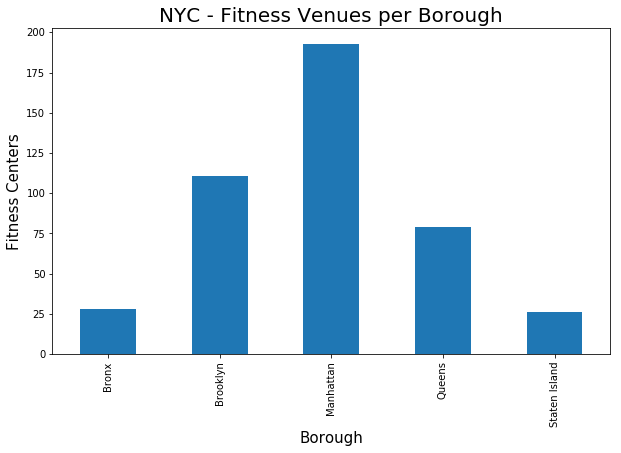

In [101]:
#lets graph nyc_combined to see which boroughs have the most fitness centers. 
import matplotlib.pyplot as plt
nyc_combined.groupby('Borough')['Venue'].count().plot.bar(figsize=(10,6))
plt.title('NYC - Fitness Venues per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Fitness Centers', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.show()

#Manhattan is first and Brooklyn is second. 

In [22]:
nyc_combined.groupby('Borough').count()

,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
Borough,,,,,,,,,
Bronx,28,28,28,28,28,28,28,28,28
Brooklyn,111,111,111,111,111,111,111,111,111
Manhattan,193,193,193,193,193,193,193,193,193
Queens,79,79,79,79,79,79,79,79,79
Staten Island,26,26,26,26,26,26,26,26,26


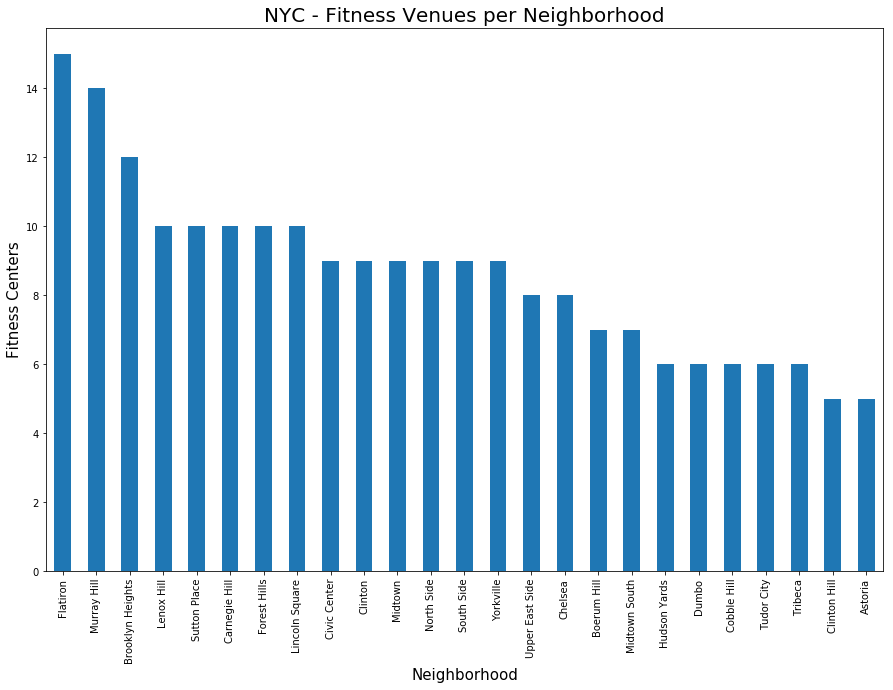

In [102]:
#lets see the top 25 neighborhoods with the most fitness venues. 

nyc_combined.groupby('Neighborhood')['Venue'].count().sort_values(ascending=False).head(25).plot.bar(figsize=(15,10))
plt.title('NYC - Fitness Venues per Neighborhood', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Fitness Centers', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.show()

#Flatiron has the most. 

In [48]:
# Count of fitness venues in each neighborhood in ascending order.

nyc_combined.groupby('Neighborhood').count()

,Borough,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
Neighborhood,,,,,,,,,
Allerton,1,1,1,1,1,1,1,1,1
Arrochar,2,2,2,2,2,2,2,2,2
Astoria,5,5,5,5,5,5,5,5,5
Auburndale,2,2,2,2,2,2,2,2,2
Battery Park City,4,4,4,4,4,4,4,4,4
Bay Ridge,2,2,2,2,2,2,2,2,2
Bay Terrace,2,2,2,2,2,2,2,2,2
Bayside,3,3,3,3,3,3,3,3,3
Bedford Park,1,1,1,1,1,1,1,1,1


**We will do our analysis based off of the venue category instead of the venue as this will bucket the data for us and we won't have to do it later.** 

In [51]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_combined[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Borough'] = nyc_combined['Borough'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

,Borough,Athletics & Sports,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Indoor Play Area,Martial Arts Dojo,Mini Golf,Outdoors & Recreation,Pilates Studio,Pool Hall,Recreation Center,Soccer Field,Sports Club,Volleyball Court,Yoga Studio
0,Bronx,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bronx,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Manhattan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Manhattan,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Manhattan,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
#Fitness center frequency breakdown by Borough
nyc_grouped = nyc_onehot.groupby('Borough').mean().reset_index()
nyc_grouped.head(10)

,Borough,Athletics & Sports,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Indoor Play Area,Martial Arts Dojo,Mini Golf,Outdoors & Recreation,Pilates Studio,Pool Hall,Recreation Center,Soccer Field,Sports Club,Volleyball Court,Yoga Studio
0,Bronx,0.071429,0.000000,0.000000,0.000000,0.500000,0.285714,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Brooklyn,0.036036,0.063063,0.045045,0.009009,0.162162,0.234234,0.000000,0.018018,0.000000,0.036036,0.000000,0.009009,0.045045,0.009009,0.000000,0.018018,0.009009,0.000000,0.306306
2,Manhattan,0.010363,0.041451,0.082902,0.005181,0.284974,0.310881,0.005181,0.005181,0.000000,0.015544,0.005181,0.005181,0.036269,0.000000,0.000000,0.005181,0.010363,0.005181,0.170984
3,Queens,0.050633,0.025316,0.012658,0.000000,0.291139,0.379747,0.000000,0.012658,0.012658,0.075949,0.000000,0.012658,0.000000,0.025316,0.000000,0.000000,0.000000,0.000000,0.101266
4,Staten Island,0.153846,0.000000,0.076923,0.038462,0.192308,0.230769,0.000000,0.000000,0.000000,0.076923,0.038462,0.038462,0.000000,0.000000,0.038462,0.000000,0.038462,0.000000,0.076923


In [25]:
#top 5 common fitness centers in each neighborhood. 
num_top_venues = 5

for hood in nyc_grouped['Borough']:
    print("----"+hood+"----")
    temp = nyc_grouped[nyc_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bronx----
                  venue  freq
0                   Gym  0.50
1  Gym / Fitness Center  0.29
2     Martial Arts Dojo  0.14
3    Athletics & Sports  0.07
4           Golf Course  0.00


----Brooklyn----
                  venue  freq
0           Yoga Studio  0.31
1  Gym / Fitness Center  0.23
2                   Gym  0.16
3            Boxing Gym  0.06
4          Cycle Studio  0.05


----Manhattan----
                  venue  freq
0  Gym / Fitness Center  0.31
1                   Gym  0.28
2           Yoga Studio  0.17
3          Cycle Studio  0.08
4            Boxing Gym  0.04


----Queens----
                  venue  freq
0  Gym / Fitness Center  0.38
1                   Gym  0.29
2           Yoga Studio  0.10
3     Martial Arts Dojo  0.08
4    Athletics & Sports  0.05


----Staten Island----
                  venue  freq
0  Gym / Fitness Center  0.23
1                   Gym  0.19
2    Athletics & Sports  0.15
3     Martial Arts Dojo  0.08
4          Cycle Studio  0.08




In [53]:
#create a function that sort the fitness centers in descending order. 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Breakdown of Most common fitness venues by Borough. Bronx - Gym Brooklyn - Yoga Studio Manhattan, Queens & Staten Island - Gym/Fitness Center

In [57]:
#let's create a new dataframe and show the top 5 fitness centers for each neighborhood.
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = nyc_grouped['Borough']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
1,Brooklyn,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
2,Manhattan,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
3,Queens,Gym / Fitness Center,Gym,Yoga Studio,Martial Arts Dojo,Athletics & Sports
4,Staten Island,Gym / Fitness Center,Gym,Athletics & Sports,Cycle Studio,Yoga Studio


In [58]:
# set number of clusters
kclusters = 3

nyc_grouped_clustering = nyc_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 2, 2, 2], dtype=int32)

In [59]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

borough_merged = neighborhoods 

# merge manhattan data to add latitude/longitude for each neighborhood
borough_merged = borough_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

In [60]:
#cluster check
borough_merged.head(10)

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
1,Bronx,Co-op City,40.874294,-73.829939,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
2,Bronx,Eastchester,40.887556,-73.827806,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
3,Bronx,Fieldston,40.895437,-73.905643,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
4,Bronx,Riverdale,40.890834,-73.912585,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
5,Bronx,Kingsbridge,40.881687,-73.902818,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
6,Manhattan,Marble Hill,40.876551,-73.910660,2,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
7,Bronx,Woodlawn,40.898273,-73.867315,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
8,Bronx,Norwood,40.877224,-73.879391,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
9,Bronx,Williamsbridge,40.881039,-73.857446,0,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center


In [100]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(borough_merged['Latitude'], borough_merged['Longitude'], borough_merged['Neighborhood'], borough_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
#Number of venues in each borough
borough_merged.groupby('Cluster_Labels').count()

,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster_Labels,,,,,,,,,
0,52,52,52,52,52,52,52,52,52
1,70,70,70,70,70,70,70,70,70
2,184,184,184,184,184,184,184,184,184


### RED - GYM & MARTIAL ARTS

In [33]:
# RED: Bronx - Gym & Martial Arts
borough_merged.loc[borough_merged['Cluster_Labels'] == 0, borough_merged.columns[[0,1] + list(range(5, borough_merged.shape[1]))]]


,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
1,Bronx,Co-op City,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
2,Bronx,Eastchester,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
3,Bronx,Fieldston,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
4,Bronx,Riverdale,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
5,Bronx,Kingsbridge,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
7,Bronx,Woodlawn,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
8,Bronx,Norwood,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
9,Bronx,Williamsbridge,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center
10,Bronx,Baychester,Gym,Gym / Fitness Center,Martial Arts Dojo,Athletics & Sports,Recreation Center


### PURPLE & YOGA

In [34]:
# PURPLE: Brooklyn - Yoga
borough_merged.loc[borough_merged['Cluster_Labels'] == 1, borough_merged.columns[[0,1] + list(range(5, borough_merged.shape[1]))]]


,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
46,Brooklyn,Bay Ridge,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
47,Brooklyn,Bensonhurst,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
48,Brooklyn,Sunset Park,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
49,Brooklyn,Greenpoint,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
50,Brooklyn,Gravesend,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
51,Brooklyn,Brighton Beach,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
52,Brooklyn,Sheepshead Bay,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
53,Brooklyn,Manhattan Terrace,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
54,Brooklyn,Flatbush,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio
55,Brooklyn,Crown Heights,Yoga Studio,Gym / Fitness Center,Gym,Boxing Gym,Pilates Studio


### GREEN & GYM/FITNESS

In [35]:
# GREEN: Manhattan, Queens, Staten Island - Gym & Fitness
borough_merged.loc[borough_merged['Cluster_Labels'] == 2, borough_merged.columns[[0,1] + list(range(5, borough_merged.shape[1]))]]


,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Manhattan,Marble Hill,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
100,Manhattan,Chinatown,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
101,Manhattan,Washington Heights,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
102,Manhattan,Inwood,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
103,Manhattan,Hamilton Heights,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
104,Manhattan,Manhattanville,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
105,Manhattan,Central Harlem,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
106,Manhattan,East Harlem,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
107,Manhattan,Upper East Side,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym
108,Manhattan,Yorkville,Gym / Fitness Center,Gym,Yoga Studio,Cycle Studio,Boxing Gym


### Based on Borough breakdown, lets say you want to live in a neighborhood with the most Yoga studios, we would CHOOSE Brooklyn, lets take a deeper dive into that borough.##

## Step 4: Clustering and Graphing for best Yoga Studios. <a name="step4"></a>

In [105]:
# set number of clusters
kclusters = 4

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 2, 3, 0, 3, 1], dtype=int32)

Let's cluster Brooklyn since it has the most Yoga studios in NYC.

In [121]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [133]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)
brooklyn_merged = brooklyn_data 

# merge brooklyn data to add latitude/longitude for each neighborhood
brooklyn_merged = brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


### Clean data.

In [135]:
brooklyn_merged = brooklyn_merged.drop(['Cluster Labels'], axis=1)

brooklyn_merged

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2.0,Pool Hall,Gym / Fitness Center,Yoga Studio,Gymnastics Gym,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Martial Arts Dojo
1,Brooklyn,Bensonhurst,40.611009,-73.995180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brooklyn,Sunset Park,40.645103,-74.010316,3.0,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
3,Brooklyn,Greenpoint,40.730201,-73.954241,1.0,Yoga Studio,Gymnastics Gym,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Martial Arts Dojo
4,Brooklyn,Gravesend,40.595260,-73.973471,3.0,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
5,Brooklyn,Brighton Beach,40.576825,-73.965094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,1.0,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
7,Brooklyn,Manhattan Terrace,40.614433,-73.957438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Brooklyn,Flatbush,40.636326,-73.958401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Brooklyn,Crown Heights,40.670829,-73.943291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#drop NA's
brooklyn_merged=brooklyn_merged.dropna()

In [137]:
#change Cluster_Labels from a float to a integer. so we can graph later. 

brooklyn_merged.Cluster_Labels = brooklyn_merged.Cluster_Labels.astype(int)

In [138]:
#check dataframe

brooklyn_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,Pool Hall,Gym / Fitness Center,Yoga Studio,Gymnastics Gym,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Martial Arts Dojo
2,Brooklyn,Sunset Park,40.645103,-74.010316,3,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
3,Brooklyn,Greenpoint,40.730201,-73.954241,1,Yoga Studio,Gymnastics Gym,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Martial Arts Dojo
4,Brooklyn,Gravesend,40.595260,-73.973471,3,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
6,Brooklyn,Sheepshead Bay,40.586890,-73.943186,1,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo


In [127]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brooklyn_merged['Latitude'], brooklyn_merged['Longitude'], brooklyn_merged['Neighborhood'], brooklyn_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Brooklyn Cluster Names. 

### RED & BALANCED

In [139]:
#Cluster 0: Balanced
brooklyn_merged.loc[brooklyn_merged['Cluster_Labels'] == 0, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Kensington,Gym,Outdoors & Recreation,Yoga Studio,Gymnastics Gym,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Martial Arts Dojo
18,Brooklyn Heights,Yoga Studio,Gym,Gym / Fitness Center,Pilates Studio,Cycle Studio,Athletics & Sports,Pool Hall,Outdoors & Recreation,Mini Golf,Volleyball Court
35,Dyker Heights,Golf Course,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
36,Gerritsen Beach,Soccer Field,Yoga Studio,Gymnastics Gym,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Martial Arts Dojo
37,Marine Park,Athletics & Sports,Soccer Field,Gym,Gymnastics Gym,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Yoga Studio
40,Downtown,Yoga Studio,Gym / Fitness Center,Boxing Gym,Martial Arts Dojo,Recreation Center,Pool Hall,Pilates Studio,Outdoors & Recreation,Mini Golf,Volleyball Court
41,Boerum Hill,Yoga Studio,Gym / Fitness Center,Boxing Gym,Martial Arts Dojo,Athletics & Sports,Recreation Center,Pool Hall,Pilates Studio,Outdoors & Recreation,Mini Golf
45,Bergen Beach,Athletics & Sports,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Yoga Studio
51,South Side,Yoga Studio,Cycle Studio,Boxing Gym,Gym,Pilates Studio,Gym / Fitness Center,Gymnastics Gym,Golf Course,Gym Pool,Martial Arts Dojo
65,Dumbo,Yoga Studio,Boxing Gym,Gym,Volleyball Court,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo


### PURPLE & YOGA

In [140]:
#Cluster 1: Yoga
brooklyn_merged.loc[brooklyn_merged['Cluster_Labels'] == 1, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Greenpoint,Yoga Studio,Gymnastics Gym,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Martial Arts Dojo
6,Sheepshead Bay,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
13,Prospect Heights,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
15,Williamsburg,Yoga Studio,Gym,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
19,Cobble Hill,Yoga Studio,Gym,Pilates Studio,Gym / Fitness Center,Gymnastics Gym,Boxing Gym,Cycle Studio,Golf Course,Gym Pool,Martial Arts Dojo
23,Fort Greene,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
24,Park Slope,Yoga Studio,Gym / Fitness Center,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Gymnastics Gym,Martial Arts Dojo
38,Clinton Hill,Yoga Studio,Boxing Gym,Gym,Gym / Fitness Center,Volleyball Court,Cycle Studio,Golf Course,Gym Pool,Gymnastics Gym,Martial Arts Dojo
50,North Side,Yoga Studio,Cycle Studio,Boxing Gym,Gym,Pilates Studio,Gymnastics Gym,Golf Course,Gym / Fitness Center,Gym Pool,Martial Arts Dojo
54,Ditmas Park,Yoga Studio,Gym / Fitness Center,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Gymnastics Gym,Martial Arts Dojo


### BLUE & GYM/FITNESS

In [141]:
# Cluster 2: Gym and Fitness
brooklyn_merged.loc[brooklyn_merged['Cluster_Labels'] == 2, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bay Ridge,Pool Hall,Gym / Fitness Center,Yoga Studio,Gymnastics Gym,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Martial Arts Dojo
20,Carroll Gardens,Gym / Fitness Center,Pilates Studio,Yoga Studio,Gymnastics Gym,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Martial Arts Dojo
22,Gowanus,Gym / Fitness Center,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Gymnastics Gym,Martial Arts Dojo
47,Prospect Park South,Gym / Fitness Center,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Gymnastics Gym,Martial Arts Dojo
49,East Williamsburg,Gym / Fitness Center,Gymnastics Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Martial Arts Dojo
53,Fort Hamilton,Gym / Fitness Center,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Gymnastics Gym,Martial Arts Dojo
55,Wingate,Gym / Fitness Center,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Gymnastics Gym,Martial Arts Dojo
67,Highland Park,Gym / Fitness Center,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym,Gym Pool,Gymnastics Gym,Martial Arts Dojo


### GREEN & GYM

In [142]:
# Cluster 3: Gym 
brooklyn_merged.loc[brooklyn_merged['Cluster_Labels'] == 3, brooklyn_merged.columns[[1] + list(range(5, brooklyn_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sunset Park,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
4,Gravesend,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
16,Bushwick,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
26,East New York,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
28,Canarsie,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
52,Ocean Parkway,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo
57,Remsen Village,Gym,Yoga Studio,Volleyball Court,Boxing Gym,Cycle Studio,Golf Course,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Martial Arts Dojo


### Based on the Brooklyn analysis above, CLUSTER 1 would be your best choice if you wanted a neighborhood with the most yoga venues and if cycling venues were your second choice then the best NEIGHBORHOOD choice would be The North Side. ##

## Step 5: Conclustion and Results. <a name="step5"></a>

So for our analysis, our decision comes down to first, which Borough you want to live in based on your fitness preferences. Then second, which neighborhood in that borough you want to live in based on the density of fitness venues. For the Borough analysis, the highest density of fitness venues from most to least were: Queens, Brooklyn, Staten Island, Bronx and Manhattan. The clusters broke down as follows, Cluster 0 had 184 total fitness venues (composed of mostly Gym & Fitness) and included Boroughs: Queens, Staten Island and Manhattan. Cluster 1 had 70 total fitness venues (composed of mostly Yoga) and included Brooklyn. Cluster 2 had 52 total fitness centers (composed of mostly Gym & Martial Arts) and included the Bronx. So based on those results you have to decide what type of fitness centers you are mostly looking for and make your decision/pivot on that decision. 
Next we analyzed Brooklyn, to see how Yoga studios density continue to breakdown by neighborhood. We created 4 clusters and the one with the most yoga studios was cluster 1, which included 11 neighborhoods to chose from. If you have a second choice, you can further narrow down your specific neighborhood choice (like shown above with yoga and cycling, with the best choice being the North Side). 
So for a quick analysis this is an good way to see where you should live based on fitness venue density, but if you want a more comprehensive analysis on where to move, you will need to look into other factors like where you work and your other interest like nightlife etc. 
#### As you can see this is a great start for finding out which neighborhood to move to in NCY based on your fitness preferences. 
Also note, all of the above analysis is dependent on the accuracy of the FourSquare data. 